In [1]:
!pip install opencv-python wget matplotlib
!apt update && apt install -y libsm6 libxext6 libgtk2.0-dev

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Get:1 file:/var/nvinfer-runtime-trt-repo-4.0.1-ga-cuda9.0  InRelease
Ign:1 file:/var/nvinfer-runtime-trt-repo-4.0.1-ga-cuda9.0  InRelease
Get:2 file:/var/nvinfer-runtime-trt-repo-4.0.1-ga-cuda9.0  Release [574 B]
Get:2 file:/var/nvinfer-runtime-trt-repo-4.0.1-ga-cuda9.0  Release [574 B]
Hit:3 http://archive.ubuntu.com/ubuntu xenial InRelease                        
Hit:4 http://security.ubuntu.com/ubuntu xenial-security InRelease          
Hit:6 http://archive.ubuntu.com/ubuntu xenial-updates InRelease        
Hit:7 http://archive.ubuntu.com/ubuntu xenial-backports InRelease
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_6

In [53]:
from __future__ import print_function
import numpy as np
import cv2
import cPickle
import matplotlib.pyplot as plt
from keras.models import model_from_json

def extractImagesAndLabels(path, file):
    f = open(path+file, 'rb')
    dict = cPickle.load(f)
    images = dict['data']
    images = np.reshape(images, (10000, 3, 32, 32))
    labels = dict['labels']
    return images, labels

images, labels = extractImagesAndLabels("../data/CIFAR-10/cifar-10-batches-py/", "test_batch")

def extractCategories(path, file):
    f = open(path+file, 'rb')
    dict = cPickle.load(f)
    return dict['label_names']

categories = extractCategories("../data/CIFAR-10/cifar-10-batches-py/", "batches.meta")

def getImage(images, id):
    image = images[id]
    image = image.transpose([1, 2, 0])
    image = image.astype('float32')
    image /= 255
    return image

def loadModel(json_desc, weights):
    # load json and create model
    json_file = open(json_desc, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(weights)
    return loaded_model
    
model = loadModel('model.json', 'model.h5')

def showImage(id):
    image = getImage(images,id)
    %matplotlib inline
    imgplot = plt.imshow(image)
    labelid = labels[id]
    category = categories[labelid]
    print("category : "+category)    

def predictImage(id):
    image = getImage(images, id)
    showImage(id)
    image = np.expand_dims(image, axis=0)
    result = model.predict(image)
    result = result[0].tolist()
    best_index=result.index(max(result))
    print ("prediction : "+categories[best_index])

category : frog
prediction : frog


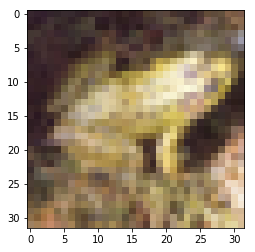

In [62]:
predictImage(19)